## 1. Welcome!
<p><img src="https://assets.datacamp.com/production/project_1170/img/office_cast.jpeg" alt="Markdown">.</p>
<p><strong>The Office!</strong> What started as a British mockumentary series about office culture in 2001 has since spawned ten other variants across the world, including an Israeli version (2010-13), a Hindi version (2019-), and even a French Canadian variant (2006-2007). Of all these iterations (including the original), the American series has been the longest-running, spanning 201 episodes over nine seasons.</p>
<p>In this notebook, we will take a look at a dataset of The Office episodes, and try to understand how the popularity and quality of the series varied over time. To do so, we will use the following dataset: <code>datasets/office_episodes.csv</code>, which was downloaded from Kaggle <a href="https://www.kaggle.com/nehaprabhavalkar/the-office-dataset">here</a>.</p>
<p>This dataset contains information on a variety of characteristics of each episode. In detail, these are:
<br></p>
<div style="background-color: #efebe4; color: #05192d; text-align:left; vertical-align: middle; padding: 15px 25px 15px 25px; line-height: 1.6;">
    <div style="font-size:20px"><b>datasets/office_episodes.csv</b></div>
<ul>
    <li><b>episode_number:</b> Canonical episode number.</li>
    <li><b>season:</b> Season in which the episode appeared.</li>
    <li><b>episode_title:</b> Title of the episode.</li>
    <li><b>description:</b> Description of the episode.</li>
    <li><b>ratings:</b> Average IMDB rating.</li>
    <li><b>votes:</b> Number of votes.</li>
    <li><b>viewership_mil:</b> Number of US viewers in millions.</li>
    <li><b>duration:</b> Duration in number of minutes.</li>
    <li><b>release_date:</b> Airdate.</li>
    <li><b>guest_stars:</b> Guest stars in the episode (if any).</li>
    <li><b>director:</b> Director of the episode.</li>
    <li><b>writers:</b> Writers of the episode.</li>
    <li><b>has_guests:</b> True/False column for whether the episode contained guest stars.</li>
    <li><b>scaled_ratings:</b> The ratings scaled from 0 (worst-reviewed) to 1 (best-reviewed).</li>
</ul>
    </div>

Jessica Alba


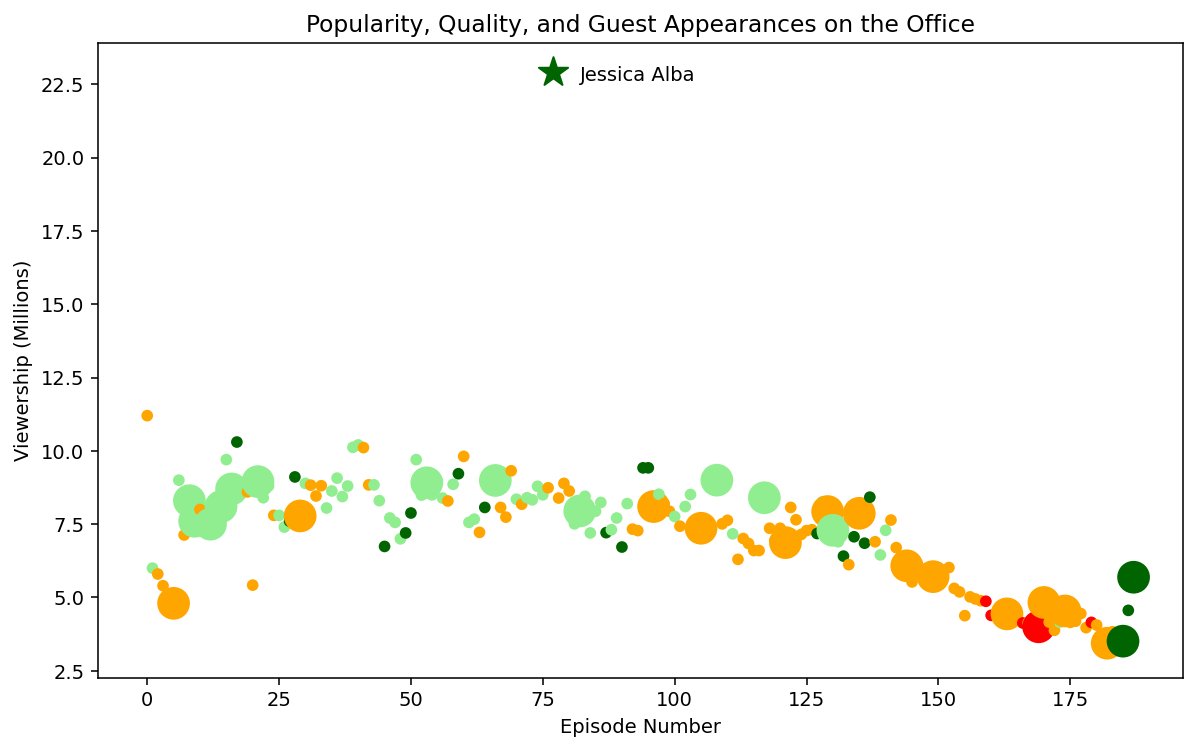

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Pandas Frame Initialize
office_episodes = pd.read_csv('datasets/office_episodes.csv')

# Save relevant columns from dataframe into arrays for easy processing
episode_number = np.array(office_episodes['episode_number'])
viewerships = np.array(office_episodes['viewership_mil'])
scaled_ratings = np.array(office_episodes['scaled_ratings'])
has_guests = np.array(office_episodes['has_guests'])

# Create an array with correct coloring based on the scaled rating for each episode
col =  np.empty([len(episode_number)], dtype=object)
col[scaled_ratings < 0.25] = "red"
col[np.logical_and(scaled_ratings >=0.25, scaled_ratings < 0.5)] = "orange"
col[np.logical_and(scaled_ratings >=0.5, scaled_ratings < 0.75)] = "lightgreen"
col[scaled_ratings >= 0.75] = "darkgreen"

# Create an array with correct bubble size based on guest appearances for each episode
size =  np.zeros([len(episode_number)])
size[has_guests == True] = 250
size[has_guests == False] = 25

# index of the outlier for the episode with super high viewership
episode_highest_viewership = viewerships.argmax()

# save the name of the top star guest featuring in the highest viewed episode
top_star = office_episodes.loc[episode_highest_viewership,'guest_stars']
top_star = top_star.split(", ")
top_star = top_star[2]
print(top_star)

#####################################
# Configure scatterplot and show    #
#####################################

fig, ax = plt.subplots()

fig.set_figwidth(10)
fig.set_figheight(6)
fig.set_dpi(140)

ax.set_title("Popularity, Quality, and Guest Appearances on the Office")
ax.set_xlabel("Episode Number")
ax.set_ylabel("Viewership (Millions)")


# create array that points out the episode with the highest viewership so we can set special marker
cluster = np.zeros(len(episode_number))
cluster[episode_highest_viewership] = 1

# To set different markers we need two scatterplots
# scatterplot 1
episode_number_sc1 = episode_number[cluster==0]
viewerships_sc1 = viewerships[cluster==0]
size_sc1 = size[cluster==0]
col_sc1 = col[cluster==0]

# scatterplot 2
episode_number_sc2 = episode_number[cluster==1]
viewerships_sc2 = viewerships[cluster==1]
size_sc2 = size[cluster==1]
col_sc2 = col[cluster==1]
ax.annotate(top_star, xy=(episode_number_sc2,viewerships_sc2), xytext=(episode_number_sc2+5,viewerships_sc2-0.3))

ax.scatter(episode_number_sc1,viewerships_sc1, s=size_sc1, c=col_sc1, marker='o')
ax.scatter(episode_number_sc2, viewerships_sc2, s=size_sc2, c=col_sc2, marker='*')

fig.savefig('scatterplot_with_color.png', dpi=300)

plt.show()

# Uncomment below for what actually passed the course
# fig, ax = plt.subplots()
# ax.set_title("Popularity, Quality, and Guest Appearances on the Office")
# ax.set_xlabel("Episode Number")
# ax.set_ylabel("Viewership (Millions)")
# plt.scatter(episode_number, viewerships, s=size, c=col, marker="o")
# plt.show()